In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [2]:
data = genfromtxt("./data/advertising.csv", delimiter=",", skip_header=1)
N = data.shape[0]
X = data[:, :3]
y = data[:, 3:]

In [3]:
def mean_normalization(X):
    N = len(X)
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    X = (X - avg) / (maxi - mini)
    X_b = np.c_[np.ones((N, 1)), X]
    return X_b, maxi, mini, avg


X_b, maxi, mini, avg = mean_normalization(X)

In [ ]:
def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.01):
    N, d_plus1 = X_b.shape
    # Step1: Init parameters
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    thetas_path = [thetas.copy()]
    losses = []

    # Step2-6: SGD loop
    for epoch in range(n_epochs):
        for i in range(N):
            random_index = i
            xi = X_b[random_index : random_index + 1]
            yi = y[random_index : random_index + 1]

            # Step 3: predict
            y_hat_i = xi.dot(thetas)

            # Step 4: MSE loss for 1 sample
            li = (y_hat_i - yi) ** 2

            # Step 5: gradient
            d_dli = 2 * xi * (y_hat_i - yi)

            # Step 6: update
            thetas = thetas - learning_rate * d_dli

            thetas_path.append(thetas.copy())
            losses.append(li[0][0])
    return thetas_path, losses


sgd_theta, losses = stochastic_gradient_descent(X_b, y, 50, 0.01)

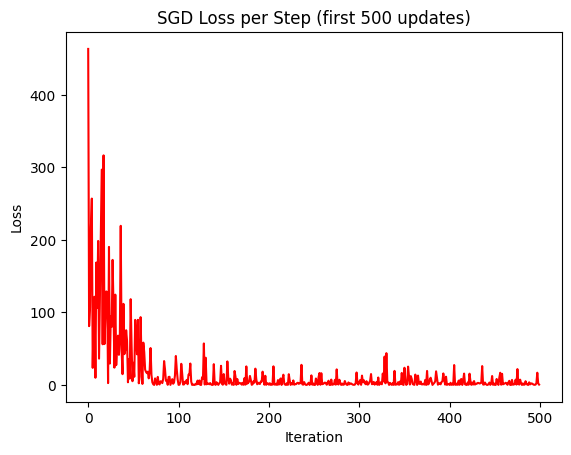

In [5]:
# In loss cho 500 bước đầu
x_axis = list(range(500))
plt.plot(x_axis, losses[:500], color="r")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("SGD Loss per Step (first 500 updates)")
plt.show()

In [ ]:
def mini_batch_gradient_descent(
    X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01
):
    N, d_plus1 = X_b.shape
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    thetas_path = [thetas.copy()]
    losses = []

    for epoch in range(n_epochs):
        # shuffle data
        shuffled_indices = np.random.permutation(N)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, N, minibatch_size):
            xi = X_b_shuffled[i : i + minibatch_size]  # (m, d+1)
            yi = y_shuffled[i : i + minibatch_size]  # (m, 1)

            y_hat_i = xi.dot(thetas)
            loss = ((y_hat_i - yi).T.dot(y_hat_i - yi)) / minibatch_size

            gradient = (2 / minibatch_size) * (xi.T.dot(y_hat_i - yi))
            thetas = thetas - learning_rate * gradient

            thetas_path.append(thetas.copy())
            losses.append(loss[0][0])

    return thetas_path, losses


mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, 50, 20, 0.01)
print(losses)


[np.float64(224.5241527848225), np.float64(310.99825632468503), np.float64(137.61038199610772), np.float64(198.5209336819264), np.float64(221.6285684736187), np.float64(168.3150935595871), np.float64(233.36678325550776), np.float64(158.8176394882799), np.float64(197.57342699135026), np.float64(143.22878264240612), np.float64(150.44286532291716), np.float64(147.85225121839494), np.float64(122.05579820661497), np.float64(115.89862724367785), np.float64(139.13387794312013), np.float64(125.65146299135742), np.float64(163.13676664809094), np.float64(149.26621125875457), np.float64(128.13788478865925), np.float64(96.82815884195342), np.float64(92.30619326626453), np.float64(97.69453184301092), np.float64(127.68489603769619), np.float64(104.25049001995463), np.float64(79.8623811085185), np.float64(107.35566366355643), np.float64(82.56751480580745), np.float64(78.35069781902253), np.float64(87.20382115187991), np.float64(62.21468644961146), np.float64(112.13528968720634), np.float64(54.0268529

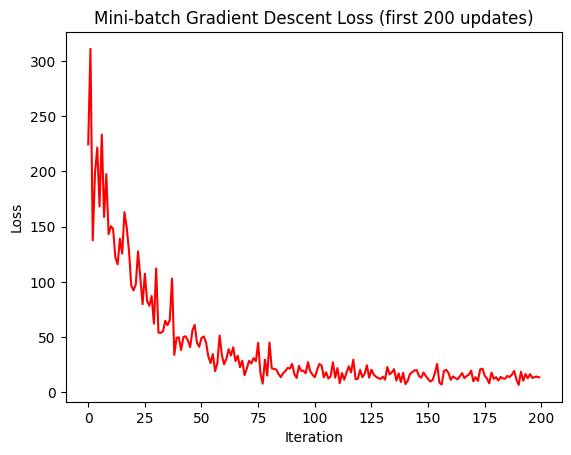

In [22]:
x_axis = list(range(200))
plt.plot(x_axis, losses[:200], color="r")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Mini-batch Gradient Descent Loss (first 200 updates)")
plt.show()